<a href="https://colab.research.google.com/github/Maheen-Siddiqui/Colab-Projects/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target== 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
target_to_flower = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['flower_name'] = df['target'].map(target_to_flower)
print(df.head())
pd.set_option('display.width', 100)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

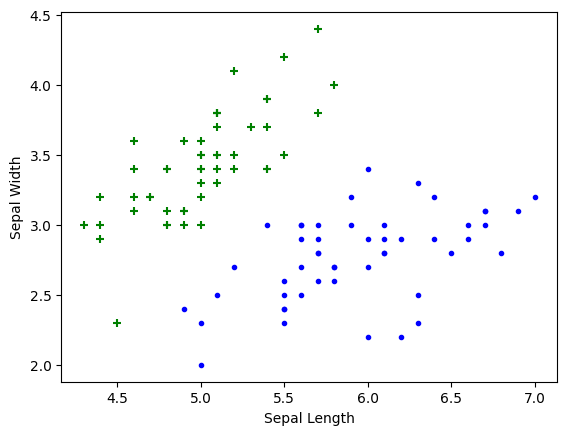

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

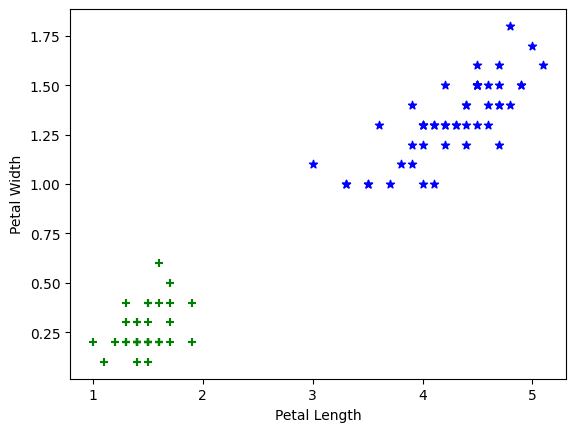

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='*')

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target',
       'flower_name'],
      dtype='object')

In [ ]:
X = df.drop(['target','flower_name'],axis ='columns')
y=df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_predict = model.predict(X_test)
print(y_predict)

[1 0 1 0 0 2 1 1 2 0 0 2 0 2 2 0 1 0 2 0 1 2 1 1 2 0 0 2 0 0]


In [ ]:
model.score(X_test,y_test)

0.9666666666666667

In [ ]:
# tuning the parameters
# for regularization : C parameter controls the regularization strength,
# which helps prevent overfitting. A smaller value of C leads to a simpler decision
#  boundary, while a larger value of C allows the model to fit the training data
# more closely, possibly leading to overfitting.

model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [ ]:
# gamma: This parameter defines the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels.
# It determines the influence of a single training example, with low values meaning 'far' and high values meaning 'close'.
# A high gamma value can lead to overfitting.
model_g = SVC(gamma=3)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [ ]:
# kernel: This parameter specifies the kernel type to be used in the algorithm.
# Common choices include 'linear', 'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'.
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
model_linear_kernal.score(X_test, y_test)

0.9333333333333333